In [1]:
import numpy as np
import matplotlib.pyplot as plt

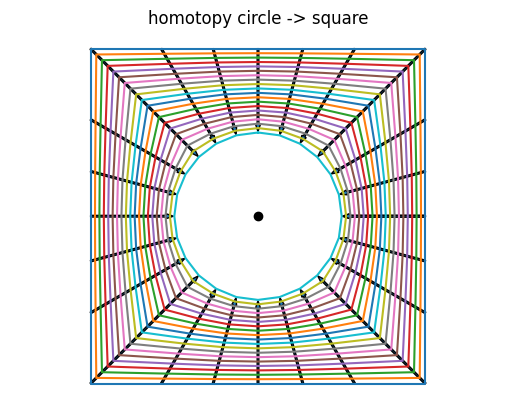

In [10]:
def nn(z):
    return max([abs(z.imag),abs(z.real)])

nn = np.vectorize(nn)

plt.axis('equal')
plt.axis('off')

T = np.linspace(0,2*np.pi,25)

circle = np.exp(1J*T)
square = 2*circle / nn(circle)

num_curves = 20
for t in np.linspace(0,1,num_curves):
    Z = t*circle + (1-t)*square
    plt.plot(Z.imag,Z.real);

for a,b in zip(square, 1.1*circle - square):
    x,y = a.real, a.imag
    dx,dy = b.real, b.imag
    plt.arrow(x,y,dx,dy, width= .02)

#WW = 2*np.array([0, 1 + 1J])
#plt.plot(WW.imag,WW.real,'k');

plt.plot([0],[0],'ko');
plt.title('homotopy circle -> square')

plt.savefig(f'homotopy_square_{num_curves}.png')

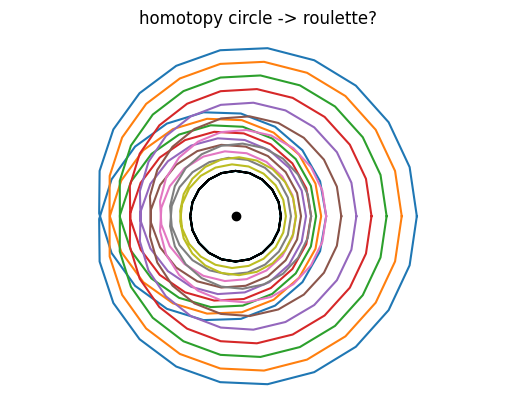

In [4]:
plt.axis('equal')
plt.axis('off')
plt.title('homotopy circle -> roulette?')

T = np.linspace(0,2*np.pi,41)

Z = np.exp(1J*T)

# W = 2*Z + .25*Z**10
W = Z + 3*Z**2

Z = Z*Z

for a,b in zip(W, Z - W):
    continue
    b *= .9
    x,y = a.real, a.imag
    dx, dy = b.real, b.imag
    plt.arrow(x,y,dx,dy,
              width=.03, fc='r',ec='r')


num_curves = 10
for t in np.linspace(0,1,num_curves):
    U = t*Z + (1-t)*W
    plt.plot(U.real,U.imag);

plt.plot(Z.real,Z.imag,'k');

plt.plot([0],[0],'ko');

plt.savefig(f'homotopy_roulette_{num_curves}.png')

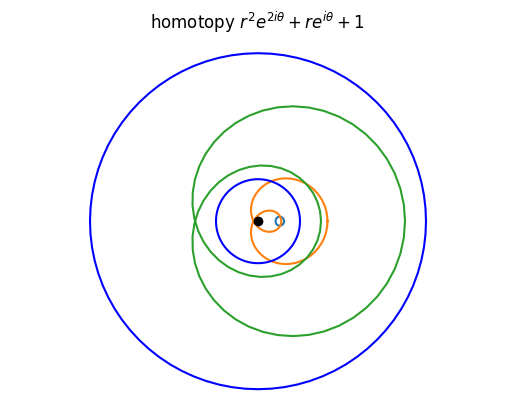

In [8]:
plt.axis('equal')
plt.axis('off')
plt.title('homotopy $r^2e^{2i\\theta} + re^{i\\theta} + 1$')

T = np.linspace(0,2*np.pi,81)


Z = np.exp(1J*T)

PZ = Z**2 + Z + 1
W = np.ones(len(Z))


num_curves = 3
for r in np.linspace(.2,2,num_curves):
    Z = r*np.exp(1J*T)
    U = Z**2 + Z + 1
    plt.plot(U.real,U.imag);

plt.plot(Z.real,Z.imag,'b');
plt.plot(4*Z.real,4*Z.imag,'b')


plt.plot([0],[0],'ko');
#plt.plot([1],[0],'ro');

plt.savefig(f'gauss_dalembert_homotopy.png')

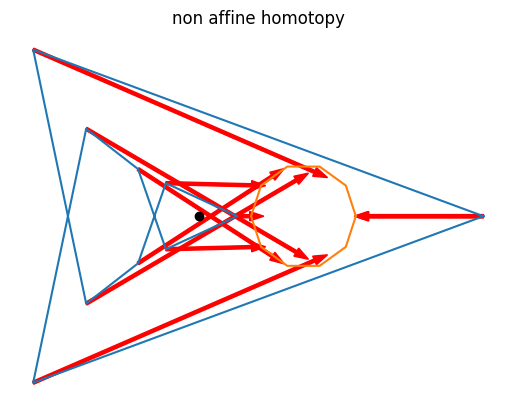

In [26]:
plt.axis('equal')
plt.axis('off')
plt.title('non affine homotopy')

T = np.linspace(0,2*np.pi,11)
Z = np.exp(1J*T)
W = 4J*Z.imag + Z.real
Z = 1 + .5*Z

# W = 2*Z + .25*Z**10
#W = Z + 3*Z**2

W = np.exp(W)

for a,b in zip(W, Z - W):
    #continue
    b *= .9
    x,y = a.real, a.imag
    dx, dy = b.real, b.imag
    plt.arrow(x,y,dx,dy,
              width=.03, fc='r',ec='r')


num_curves = 2
for t in np.linspace(0,1,num_curves):
    U = t*Z + (1-t)*W
    plt.plot(U.real,U.imag);

#plt.plot(Z.real,Z.imag,'k');

plt.plot([0],[0],'ko');

#plt.savefig(f'homotopy_roulette_{num_curves}.png')

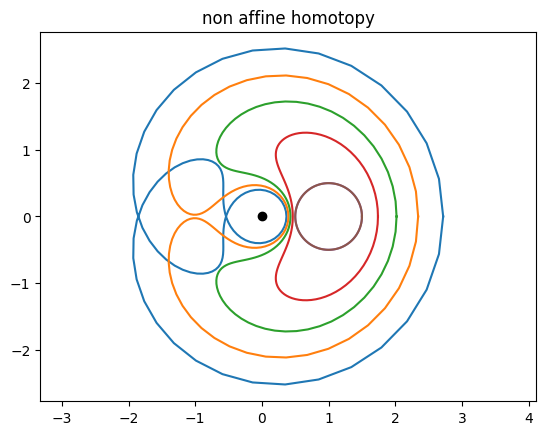

In [84]:
plt.axis('equal')
#plt.axis('off')
title = 'non affine homotopy'
plt.title(title)

T = np.linspace(0,2*np.pi,121)
Z = np.exp(1J*T)
RC = 1 + .5*Z
RL =  np.log(np.abs(RC)) + 1J*np.arctan2(RC.imag,RC.real)

W = Z.real + 4J*Z.imag 

num_curves = 5
for t in np.linspace(0,1,num_curves):
    H = (1-t)*W + t*RL
    U = np.exp(H)
    plt.plot(U.real,U.imag);

#plt.plot(Z.real,Z.imag,'k');

plt.plot(RC.real, RC.imag)
plt.plot([0],[0],'ko');

plt.savefig(f"{title.replace(' ','_')}_{num_curves}.png")

In [41]:
T = np.linspace(0,2*np.pi,5)
Z = np.exp(1J*T)
RC = 1 + .5*Z
RL =  np.log(np.abs(RC)) + 1J*np.arctan(RC.imag,RC.real)

In [48]:
np.exp(RL)


array([1.5+0.0000000e+00j, 1. +5.0000000e-01j, 0.5+3.0616170e-17j,
       1. -5.0000000e-01j, 1.5-1.8369702e-16j])

In [31]:

verts = np.zeros((8,3))
verts[1:4,:] = np.identity(3)
verts[5:,:]  = -np.identity(3)

x,y,z = verts.T
ff = np.array([[0,1,2], [0,1,3], [0,2,3], [1,2,3]])
faces = np.zeros((8,3))
faces[:4,:] = ff
faces[4:,:] = ff + 4
 

In [36]:
import json 

# Define the vertices of the octahedron
verts = np.array([
      [1, 0, 0],   # Vertex 0
      [-1, 0, 0],  # Vertex 1
      [0, 1, 0],   # Vertex 2
      [0, -1, 0],  # Vertex 3
      [0, 0, 1],   # Vertex 4
      [0, 0, -1]   # Vertex 5
  ])

# Define the faces of the octahedron (triangular faces)
faces = np.array([
      [0, 2, 4],  # Top front face
      [2, 1, 4],  # Top left face
      [1, 3, 4],  # Top back face
      [3, 0, 4],  # Top right face
      [0, 3, 5],  # Bottom front face
      [3, 1, 5],  # Bottom left face
      [1, 2, 5],  # Bottom back face
      [2, 0, 5]   # Bottom right face
  ])

    with open('octahedron.json', 'w') as fp:
          json.dump({'vertices': verts.tolist(),
                  'faces': faces.tolist()},fp)

In [40]:

verts = np.zeros((8,3))
verts[1:4,:] = np.identity(3)
verts[5:,:]  = -np.identity(3) + [0,0,1]

verts

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.],
       [-1.,  0.,  1.],
       [ 0., -1.,  1.],
       [ 0.,  0.,  0.]])

In [38]:
ls o*


octahedron.json  octohedron.py
